# Telecom Churn Forecast

This project uses simulated customer data to analyze the factors that contribute to customer churn, and prototype a machine learning model that will predict customer churn. The table of contents can be used to skip through to specific sections.

## Opening Data and getting Information

In [1]:
#import packages and define function to get needed information from various data sources.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

contract_df = pd.read_csv('downloads/final_provider/contract.csv')
def get_information(df):
    print('Head:')
    print()
    display(df.head())
    print ('-'*100)
    print('Info:')
    print()
    display(df.info())
    print ('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print ('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,4))
    print ('-'*100)
    print('Shape:')
    print(df.shape)
    print ('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.'.format(df.duplicated().sum()) + "\033[0m")
    
def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls
get_information(contract_df)

Head:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


----------------------------------------------------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,8241-JUIQO,2014-02-01,No,Month-to-month,Yes,Electronic check,20.2
freq,1,366,5174,3875,4171,2365,11



Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
BeginDate,0,0.0
EndDate,0,0.0
Type,0,0.0
PaperlessBilling,0,0.0
PaymentMethod,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(7043, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


In [2]:
internet_df = pd.read_csv('downloads/final_provider/internet.csv')
get_information(internet_df)

Head:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,5567-WSELE,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


----------------------------------------------------------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,5567-WSELE,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0
DeviceProtection,0,0.0
TechSupport,0,0.0
StreamingTV,0,0.0
StreamingMovies,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(5517, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


In [3]:
personal_df = pd.read_csv('downloads/final_provider/personal.csv')
get_information(personal_df)

Head:



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


----------------------------------------------------------------------------------------------------


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,8241-JUIQO,Male,No,No
freq,1,3555,3641,4933



Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(7043, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


In [4]:
phone_df = pd.read_csv('downloads/final_provider/phone.csv')
get_information(phone_df)

Head:



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,8241-JUIQO,No
freq,1,3390


----------------------------------------------------------------------------------------------------


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,8241-JUIQO,No
freq,1,3390



Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
MultipleLines,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(6361, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


In [5]:
#merge seperate dataframes into one large dataframe
full_df = contract_df.merge(internet_df, how='outer')
full_df = full_df.merge(personal_df, how='outer')
full_df = full_df.merge(phone_df, how='outer')
get_information(full_df)

Head:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-n

None

----------------------------------------------------------------------------------------------------
Describe:



,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


----------------------------------------------------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,Partner,Dependents,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043,5517,5517,5517,5517,5517,5517,5517,7043,7043,7043,6361
unique,7043,77,5,3,2,4,6531,2,2,2,2,2,2,2,2,2,2,2
top,8241-JUIQO,2014-02-01,No,Month-to-month,Yes,Electronic check,20.2,Fiber optic,No,No,No,No,No,No,Male,No,No,No
freq,1,366,5174,3875,4171,2365,11,3096,3498,3088,3095,3473,2810,2785,3555,3641,4933,3390



Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.00
BeginDate,0,0.00
EndDate,0,0.00
Type,0,0.00
PaperlessBilling,0,0.00
PaymentMethod,0,0.00
MonthlyCharges,0,0.00
TotalCharges,0,0.00
InternetService,1526,21.67
OnlineSecurity,1526,21.67


----------------------------------------------------------------------------------------------------
Shape:
(7043, 20)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


I loaded all the separate data frames and merged them into one. This way all customers data is in the same place and we can pre-process, do EDA and define features and target from a good foundation 

## Preprocessing for EDA.

In [6]:
# Fill null values with 'N/A' for customers without internet or phone service

full_df = full_df.fillna('N/A')
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


I filled the null values with a N/A string. Because a null value represents that the customer does not have the service listed.

In [7]:
no_service = full_df.query('MultipleLines == "N/A" & InternetService == "N/A"')
no_service.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        0 non-null      object 
 1   BeginDate         0 non-null      object 
 2   EndDate           0 non-null      object 
 3   Type              0 non-null      object 
 4   PaperlessBilling  0 non-null      object 
 5   PaymentMethod     0 non-null      object 
 6   MonthlyCharges    0 non-null      float64
 7   TotalCharges      0 non-null      object 
 8   InternetService   0 non-null      object 
 9   OnlineSecurity    0 non-null      object 
 10  OnlineBackup      0 non-null      object 
 11  DeviceProtection  0 non-null      object 
 12  TechSupport       0 non-null      object 
 13  StreamingTV       0 non-null      object 
 14  StreamingMovies   0 non-null      object 
 15  gender            0 non-null      object 
 16  SeniorCitizen     0 non-null      int64  
 17  Partner  

I checked to see if there were any customers that were listed but did not have internet or phone service there were not any so that means that every entry is relevant. 

In [8]:

full_df['churn'] = pd.DataFrame({'churn': (full_df['EndDate'] != 'No').astype(int)})
full_df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

I added a churn column to represent whether the customer has canceled service with us or not. This is our target a 0 represents a customer that has not left and the 1 represents a customer that has canceled service. We see an imbalance in the two groups that we will have to fix when we do the modeling.

## EDA

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


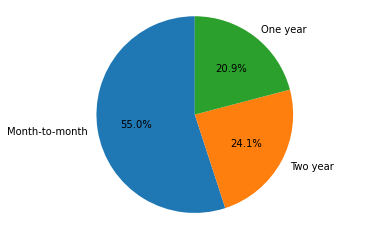

In [9]:
contract_type = full_df['Type'].value_counts()
print(contract_type)


fig1, ax1 = plt.subplots()
ax1.pie(contract_type.values, labels=contract_type.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

55 percent of the customers are month to month. This means more than half of our customers are always at ric=sk of canceling service.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


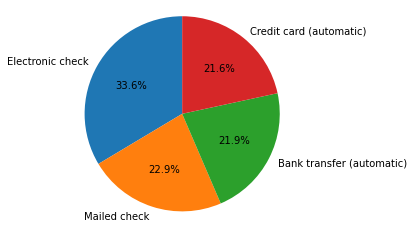

In [10]:
payment_method = full_df['PaymentMethod'].value_counts()
print(payment_method)

fig1, ax1 = plt.subplots()
ax1.pie(payment_method.values, labels=payment_method.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

There are relatively even proportions of payment type.

Fiber optic    3096
DSL            2421
N/A            1526
Name: InternetService, dtype: int64


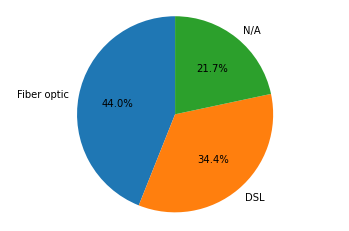

In [11]:
internet_service = full_df['InternetService'].value_counts()
print(internet_service)


fig1, ax1 = plt.subplots()
ax1.pie(internet_service.values, labels=internet_service.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

No     3498
Yes    2019
N/A    1526
Name: OnlineSecurity, dtype: int64


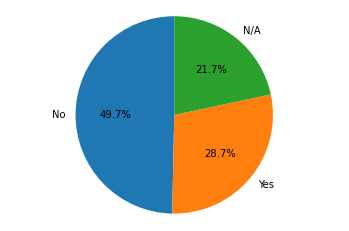

No     3088
Yes    2429
N/A    1526
Name: OnlineBackup, dtype: int64


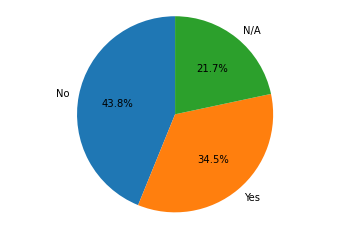

No     3095
Yes    2422
N/A    1526
Name: DeviceProtection, dtype: int64


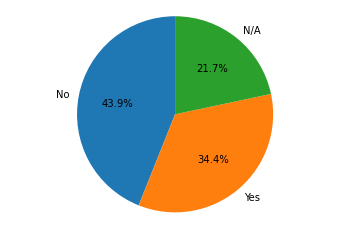

No     3473
Yes    2044
N/A    1526
Name: TechSupport, dtype: int64


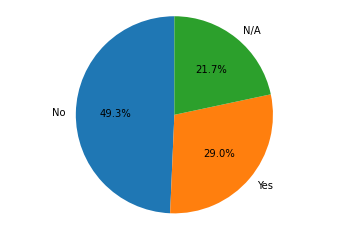

No     2810
Yes    2707
N/A    1526
Name: StreamingTV, dtype: int64


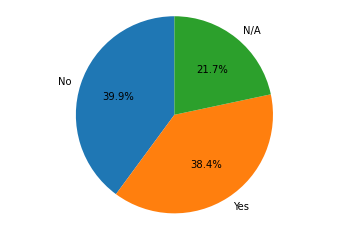

No     2785
Yes    2732
N/A    1526
Name: StreamingMovies, dtype: int64


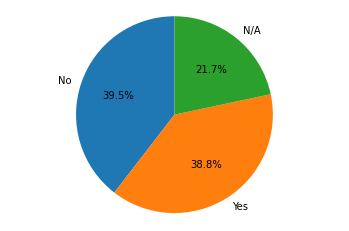

In [12]:
online_security = full_df['OnlineSecurity'].value_counts()
print(online_security)


fig1, ax1 = plt.subplots()
ax1.pie(online_security.values, labels=online_security.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

online_backup = full_df['OnlineBackup'].value_counts()
print(online_backup)


fig1, ax1 = plt.subplots()
ax1.pie(online_backup.values, labels=online_backup.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

device_protection = full_df['DeviceProtection'].value_counts()
print(device_protection)


fig1, ax1 = plt.subplots()
ax1.pie(device_protection.values, labels=device_protection.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

tech_support = full_df['TechSupport'].value_counts()
print(tech_support)


fig1, ax1 = plt.subplots()
ax1.pie(tech_support.values, labels=tech_support.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

stream_tv = full_df['StreamingTV'].value_counts()
print(stream_tv)


fig1, ax1 = plt.subplots()
ax1.pie(stream_tv.values, labels=stream_tv.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

stream_movies = full_df['StreamingMovies'].value_counts()
print(stream_movies)


fig1, ax1 = plt.subplots()
ax1.pie(stream_movies.values, labels=stream_movies.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

Male      3555
Female    3488
Name: gender, dtype: int64


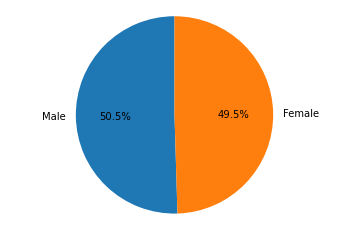

In [13]:
gender = full_df['gender'].value_counts()
print(gender)


fig1, ax1 = plt.subplots()
ax1.pie(gender.values, labels=gender.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

There is an even number of men and women in this data

No     4933
Yes    2110
Name: Dependents, dtype: int64


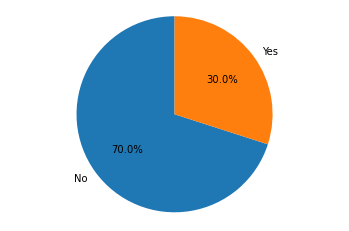

In [14]:
dependents = full_df['Dependents'].value_counts()
print(dependents)


fig1, ax1 = plt.subplots()
ax1.pie(dependents.values, labels=dependents.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

## Questions

1. How should we handle to customers who have canceled their service should we change them to yes to make it a binary classification task?
2. Should we remove a-la-carte services for internet services to remove any potential class imbalances in training data? The service should be reflected in the monthly cost.
3. Would it benefit us to divide customers into different groups and study trends or should we just define the target and focus an the classification task?


## Work Plan

### preprocess the data for a classificaton model making sure all data types are correct

- Make the customer id the index
- remove the enddate columns since we were able to create the target from that info
- remove unnecessary columns from data
- encode categorical features to have a numeric value for each category

### define features and target and split data into train and test sets

- use train test split to define test and train data set

### Train and evaluate multiple classsifacation models to achieve acceptable metrics.

- train a constant model to use as a baseline.
- find baseline AUC-ROC score (we are using this metric because it will balance false positives and false negatives which is important for this task.)
- Train and test a logistic regression and random forest model using the class weight argument and then using the upsample and down sample function
- Train and test a gradient boosting model using XGBoost and resampled features and by fine tuning the sclae_pos_weight hyperprameter
- a passing AUC-ROC score is .75 or greater

In [15]:
full_df.index = full_df['customerID']
full_df = full_df.drop('customerID', axis=1)
full_df = full_df.drop(['EndDate', 'Partner', 'Dependents'], axis=1)
full_df.head()

,BeginDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,MultipleLines,churn
customerID,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,N/A,0
5575-GNVDE,2017-04-01,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,0
3668-QPYBK,2019-10-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,1
7795-CFOCW,2016-05-01,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,N/A,0
9237-HQITU,2019-09-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,1


I made the customer ID the index because every value was unique and it would not do well in the encoder and result in too many classes. I dropped the EndDate, Partner and Dependents column because the EndDate column already served its purpose to help us define the target and now the values will not help the model make a prediction. the Partner and dependents column did not appear to have an effect on the target and was deemed unnecessary.

In [16]:

from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()
ordinal_df = pd.DataFrame(encoder.fit_transform(full_df), columns=full_df.columns)
ordinal_df.head()


,BeginDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,MultipleLines,churn
0,75.0,0.0,1.0,2.0,142.0,2505.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,42.0,1.0,0.0,3.0,498.0,1466.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,72.0,0.0,1.0,3.0,436.0,157.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,31.0,1.0,0.0,0.0,266.0,1400.0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0
4,71.0,0.0,1.0,2.0,729.0,925.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


I encoded the data to make the features and target all numerical most of the columns only had a few different classes and this method of encoding seemed like the best way to go.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

features = ordinal_df.drop('churn', axis=1)
target = ordinal_df['churn']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test) 


I defined the features and the target and split the data into test and train sets. Then i scaled the dat to normalize the numerical features with different dispersions.

<div class="alert alert-success">
    Target feature fits the task. The train-test split is reasonable. Scaling is done correctly.
</div>

In [18]:
def constant_model (target_test):
    constant_predictions = []
    for i in target_test:
        constant_predictions.append(1)
        
    return constant_predictions

constant_predictions = constant_model(target_test)

print(accuracy_score(target_test, constant_predictions))

0.26916524701873934


I made a function that basically guesses a one every time. This helped me to see the class imbalance for the ones in the test set. This shows that there are about 27% ones in the test set and this will help me depending on which methods i need to use to balance classes.

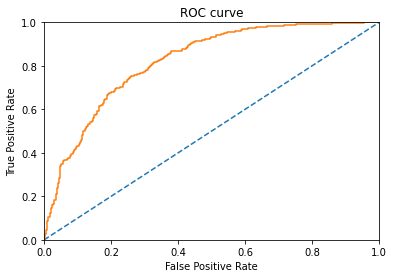

0.8215078404951823


In [19]:
from sklearn.linear_model import LogisticRegression



logreg_model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
logreg_model.fit(features_train, target_train)
logreg_probabilities_valid = logreg_model.predict_proba(features_test)
logreg_probabilities_one_valid = logreg_probabilities_valid[:, 1]
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(target_test, logreg_probabilities_one_valid)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logreg_fpr, logreg_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

print(roc_auc_score(target_test, logreg_probabilities_one_valid))

In the logistic regression model i set the class_weight argument to balanced to help with the class imbalance. i got a ROC-AUC score of approximately 0.82 this is a good model.

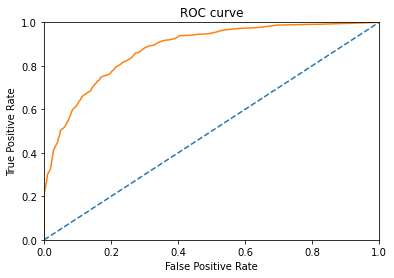

0.8782534858484226


In [20]:
from sklearn.ensemble import RandomForestClassifier

randfor_model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=100)
randfor_model.fit(features_train, target_train)
randfor_probabilities_valid = randfor_model.predict_proba(features_test)
randfor_probabilities_one_valid = randfor_probabilities_valid[:, 1]

randfor_fpr, randfor_tpr, randfor_thresholds = roc_curve(target_test, randfor_probabilities_one_valid)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(randfor_fpr, randfor_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

print(roc_auc_score(target_test, randfor_probabilities_one_valid))

In the initial random forest model I set the class_weight to balanced and the n_estimators to 100 which is the default for that hyperparameter. the ROC-AUC score is just under 0.88. 

In [21]:
from sklearn.model_selection import cross_val_score
for est in range(100, 1100, 100):
    randfor_model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=est)
    print('n_estimators:', est, 'Average accuracy score:', cross_val_score(randfor_model, features_train, target_train, cv=5).mean())
    
    

n_estimators: 100 Average accuracy score: 0.8307450689487114
n_estimators: 200 Average accuracy score: 0.8290398067715948
n_estimators: 300 Average accuracy score: 0.8290407026748087
n_estimators: 400 Average accuracy score: 0.8307436355035692
n_estimators: 500 Average accuracy score: 0.8313123548636794
n_estimators: 600 Average accuracy score: 0.8307443522261403
n_estimators: 700 Average accuracy score: 0.831690605200539
n_estimators: 800 Average accuracy score: 0.8311227817436426
n_estimators: 900 Average accuracy score: 0.8307439938648548
n_estimators: 1000 Average accuracy score: 0.8305542415641753


I created a quick loop to tune the n_estimators hyper parameter and found that that an n_estimators of 700 has the best accuracy so i will use 700 for the final model in the test set.

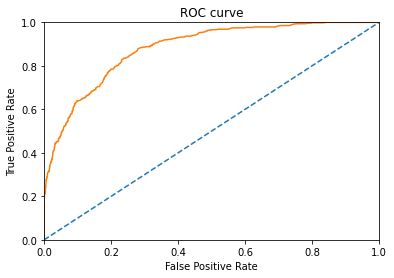

0.8803082758778961


In [22]:

randfor_model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=700)
randfor_model.fit(features_train, target_train)
randfor_probabilities_valid = randfor_model.predict_proba(features_test)
randfor_probabilities_one_valid = randfor_probabilities_valid[:, 1]

randfor_fpr, randfor_tpr, randfor_thresholds = roc_curve(target_test, randfor_probabilities_one_valid)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(randfor_fpr, randfor_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

print(roc_auc_score(target_test, randfor_probabilities_one_valid))

I set the n_estimators hyperparameter to 700 and that gave us the best result of 0.88 for the ROC-AUC score.

0:	learn: 0.5953764	total: 61.1ms	remaining: 550ms
1:	learn: 0.5450083	total: 64.7ms	remaining: 259ms
2:	learn: 0.5145789	total: 67.6ms	remaining: 158ms
3:	learn: 0.4936628	total: 70.2ms	remaining: 105ms
4:	learn: 0.4837897	total: 72.9ms	remaining: 72.9ms
5:	learn: 0.4718957	total: 74.9ms	remaining: 49.9ms
6:	learn: 0.4666931	total: 77ms	remaining: 33ms
7:	learn: 0.4627362	total: 79ms	remaining: 19.8ms
8:	learn: 0.4599857	total: 81.8ms	remaining: 9.09ms
9:	learn: 0.4557661	total: 83.7ms	remaining: 0us


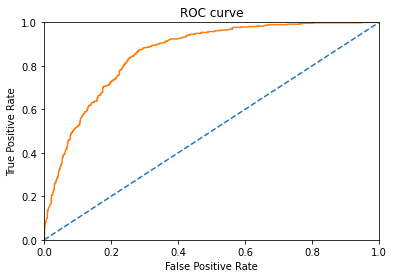

0.8572752844904744


In [23]:
from catboost import CatBoostClassifier


catmodel = CatBoostClassifier(loss_function='Logloss', depth=5, learning_rate=0.5, auto_class_weights='Balanced', iterations=10)

catmodel.fit(features_train, target_train)
cat_probabilities_valid = catmodel.predict_proba(features_test)
cat_probabilities_one_valid = cat_probabilities_valid[:, 1]

cat_fpr, cat_tpr, cat_thresholds = roc_curve(target_test, cat_probabilities_one_valid)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(cat_fpr, cat_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

print(roc_auc_score(target_test, cat_probabilities_one_valid))


I initially wanted to train an XGBoost model but i could not get it to work on my computer. Instead i chose a catboost model and set the class weights to balanced and ran it for 10 iterations it preformed worse than the random forest model and since the random forest preformed so well i did not further tune the catboost model.

## Model selection

I would choose this fine tuned random forest model because it yielded the best results(ROC-AUC = 0.88). Speed is not something that is too much of a factor because this model will most likely not be ran in real time so the random forest model will do.

## Solution Report

The goal of this project was to predict whether our customer has canceled their service or not also known as churn.

### Process

- I started by doing some EDA to gain insight as to what factors determine churn, decide what type of model needs to be made. 
- Then the plan was to encode and features then build models and deal with the class imbalance found in the EDA. 
- I decided to build a logistic regression model, a random forest model, and a XGBoost model. 

### Obstacles

- I would first try the model's built in methods of dealing with the imbalance. 
    - The logistic regression and decision tree model both preformed well with the built in class imbalance method. 
- I could not get XGBoost to work on my computer so instead I used catboost so that i can still have a gradient boosting model. 

### Key Steps

- The key steps in this project 
    - were creating the target and finding the class imbalance 
    - encoding and scaling the features 
    - building the models with hyperparameter tuning. 
- the best preforming model was the Random Forest model which gave us an ROC-AUC of .88.